In [104]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
import warnings
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn import metrics

In [187]:
df = pd.read_csv("covid_data.csv")
df[["human_development_index"]]
pd.options.display.max_columns = None
pd.options.display.max_rows = None
corr = df.corr()
print(corr.abs().unstack().sort_values(kind="quicksort").drop_duplicates()[-100:])

weekly_icu_admissions_per_million     weekly_hosp_admissions                     0.716001
total_tests                           excess_mortality_cumulative_absolute       0.717114
life_expectancy                       aged_70_older                              0.717156
new_deaths_per_million                hosp_patients_per_million                  0.725111
new_cases_smoothed                    total_deaths                               0.725595
                                      weekly_hosp_admissions                     0.731456
aged_65_older                         life_expectancy                            0.731725
people_vaccinated                     total_tests                                0.732866
people_fully_vaccinated               total_tests                                0.733868
new_tests_smoothed                    icu_patients                               0.735279
people_fully_vaccinated_per_hundred   total_boosters_per_hundred                 0.737198
new_vaccin

In [106]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.sort_values(by='date')
df = df.reset_index()
df = df.rename(columns={"index": "old_index"})

In [107]:


#too add to new table
df_fully_vaxed = pd.DataFrame({'location':[], 'percent_fully_vaccinated':[]})

visited_country = []
for i in range(len(df['location'])):
    if df['location'][i] in visited_country:
        continue
    selected_rows = df.loc[df['location'] == df['location'][i]]
    selected_rows.sort_values(by='date', ascending=False, inplace=True)
    selected_rows = selected_rows.dropna(subset=['people_fully_vaccinated'])
    population = selected_rows.loc[:, ['population']]
    people_fully_vaccinated = selected_rows.loc[:, ['people_fully_vaccinated']]
    max_pop =  population.max()
    max_fully_vax = people_fully_vaccinated.max()
    percent_fully_vaxed = max_fully_vax[0]/max_pop[0] *100
    visited_country.append(df['location'][i])
    df_fully_vaxed.loc[i] = {'location': df['location'][i], 'percent_fully_vaccinated': percent_fully_vaxed}
    #print(df['location'][i], ": ", percent_fully_vaxed)
    
#df_fully_vaxed = pd.DataFrame(data, index = data.keys())

In [108]:
df_fully_vaxed = df_fully_vaxed.dropna()
df_fully_vaxed

,location,percent_fully_vaccinated
0,Argentina,83.216580
1,Mexico,64.193974
7,Thailand,74.600148
12,Latvia,70.568350
13,Estonia,63.922782
...,...,...
101964,Kiribati,56.301196
102744,Cook Islands,86.355096
108912,Pitcairn,100.000000
110285,Niue,62.858607


In [109]:
cont_data = []
for i in range(len(df['date'])):
    continuous_date_without_year = df['date'][i].timetuple().tm_yday
    if df['year'][i]-2020 > 0:
        continuous_date_without_year += 365*(df['year'][i]-2020)
    cont_data.append(continuous_date_without_year)

In [110]:
df['cont_date'] = cont_data

In [112]:
#df.fillna(0, inplace=True)
# df.dropna()
df

,old_index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day,cont_date
0,7990,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,...,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1,1,1
1,136265,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,...,0.779,127504120.0,NaN,NaN,NaN,NaN,2020,1,1,1
2,136266,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,...,0.779,127504120.0,NaN,NaN,NaN,NaN,2020,1,2,2
3,7991,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,...,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1,2,2
4,7992,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,...,0.845,45510324.0,NaN,NaN,NaN,NaN,2020,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238229,81604,GHA,Africa,Ghana,2022-11-27,171009.0,0.0,1.857,1461.0,0.0,...,0.611,33475870.0,NaN,NaN,NaN,NaN,2022,11,27,1061
238230,80615,DEU,Europe,Germany,2022-11-27,36373165.0,1.0,23965.714,157495.0,NaN,...,0.947,83369840.0,NaN,NaN,NaN,NaN,2022,11,27,1061
238231,79579,GEO,Asia,Georgia,2022-11-27,1805698.0,NaN,NaN,16912.0,0.0,...,0.812,3744385.0,NaN,NaN,NaN,NaN,2022,11,27,1061
238232,85577,GRD,North America,Grenada,2022-11-27,19616.0,0.0,0.000,237.0,0.0,...,0.779,125459.0,NaN,NaN,NaN,NaN,2022,11,27,1061


In [113]:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
corr_matrix = df.corr().abs()
#plot the heatmap
#sns.heatmap(corr_matrix, annot=True, linewidths=.5)
corr_matrix

corr_matrix = corr_matrix[corr_matrix > 0.5]
corr_matrix = corr_matrix[corr_matrix.index.to_list()]
corr_matrix

,old_index,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day,cont_date
old_index,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cases,NaN,1.000000,0.671281,0.694447,0.936471,NaN,NaN,NaN,NaN,NaN,...,NaN,0.614839,0.753939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,NaN,0.671281,1.000000,0.972716,0.705354,0.645232,0.632060,NaN,NaN,NaN,...,NaN,0.543217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases_smoothed,NaN,0.694447,0.972716,1.000000,0.725595,0.639532,0.651794,NaN,NaN,NaN,...,NaN,0.557834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,NaN,0.936471,0.705354,0.725595,1.000000,0.605267,0.624088,NaN,NaN,NaN,...,NaN,0.712860,0.926142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
excess_mortality_cumulative_per_million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.693282,NaN,1.000000,0.558153,NaN,NaN,0.577677
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.502496,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.558153,1.000000,NaN,NaN,0.940454
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [114]:
#what columns using
df1_selected_columns = df[["cont_date","location", "gdp_per_capita", "extreme_poverty", "handwashing_facilities", "new_cases_smoothed_per_million","human_development_index"]]
df2_selected_columns = df_fully_vaxed[["location", "percent_fully_vaccinated"]]
df_merged = pd.merge(df1_selected_columns, df2_selected_columns, on="location", how="inner")
#df_merged.fillna(0, inplace=True)
#df_merged = df_merged.dropna()
df_merged = df_merged[df_merged['gdp_per_capita'].notna()]
df_merged = df_merged[df_merged['extreme_poverty'].notna()]
df_merged = df_merged[df_merged['handwashing_facilities'].notna()]
df_merged = df_merged[df_merged['new_cases_smoothed_per_million'].notna()]
df_merged = df_merged[df_merged['human_development_index'].notna()]
df_merged = df_merged[df_merged['percent_fully_vaccinated'].notna()]



In [97]:
df_merged

,cont_date,location,gdp_per_capita,extreme_poverty,handwashing_facilities,new_cases_smoothed_per_million,human_development_index,percent_fully_vaccinated
1125,64,Mexico,17336.469,2.5,87.847,0.006,0.779,64.193974
1126,65,Mexico,17336.469,2.5,87.847,0.006,0.779,64.193974
1127,66,Mexico,17336.469,2.5,87.847,0.006,0.779,64.193974
1128,67,Mexico,17336.469,2.5,87.847,0.002,0.779,64.193974
1129,68,Mexico,17336.469,2.5,87.847,0.002,0.779,64.193974
...,...,...,...,...,...,...,...,...
220432,1057,Vanuatu,2921.909,13.2,25.209,0.000,0.609,40.305866
220433,1058,Vanuatu,2921.909,13.2,25.209,0.000,0.609,40.305866
220434,1059,Vanuatu,2921.909,13.2,25.209,0.000,0.609,40.305866
220435,1060,Vanuatu,2921.909,13.2,25.209,0.000,0.609,40.305866


In [180]:

# X = df_merged[["gdp_per_capita", "extreme_poverty","handwashing_facilities","percent_fully_vaccinated","cont_date" ]
X = df_merged[[ "extreme_poverty","handwashing_facilities","percent_fully_vaccinated","gdp_per_capita"]]
Y = df_merged[["human_development_index"]]


Text(0, 0.5, 'human_development_index')

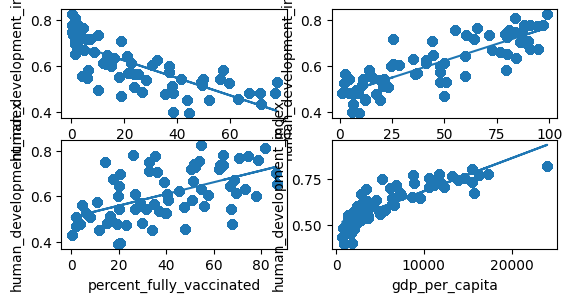

In [159]:

# plt.scatter(X,Y)
# plt.xlabel("GDP")
# plt.ylabel("human_development_index")

plt.subplot(3, 2, 1)
a,b = np.polyfit(X["extreme_poverty"],Y,1)
plt.scatter(X["extreme_poverty"],Y)
#plt.plot(X["extreme_poverty"],Y)
plt.plot(X["extreme_poverty"], a * X["extreme_poverty"] + b)
plt.xlabel("extreme_poverty")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 2)
a,b = np.polyfit(X["handwashing_facilities"],Y,1)
plt.scatter(X["handwashing_facilities"],Y)
plt.plot(X["handwashing_facilities"], a * X["handwashing_facilities"] + b)
plt.xlabel("handwashing_facilities")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 3)
a,b = np.polyfit(X["percent_fully_vaccinated"],Y,1)
plt.scatter(X["percent_fully_vaccinated"],Y)
plt.plot(X["percent_fully_vaccinated"], a * X["percent_fully_vaccinated"] + b)
plt.xlabel("percent_fully_vaccinated")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 4)
a,b = np.polyfit(X["gdp_per_capita"],Y,1)
plt.scatter(X["gdp_per_capita"],Y)
plt.plot(X["gdp_per_capita"], a * X["gdp_per_capita"] + b)
plt.xlabel("gdp_per_capita")
plt.ylabel("human_development_index")


In [163]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
len(X_train)

from sklearn import preprocessing
x_scaler = preprocessing.RobustScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

y_scaler = preprocessing.RobustScaler().fit(y_train)
y_train = y_scaler.transform(y_train)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train , y_train)

y_pred = model.predict(X_train)




Text(0, 0.5, 'human_development_index')

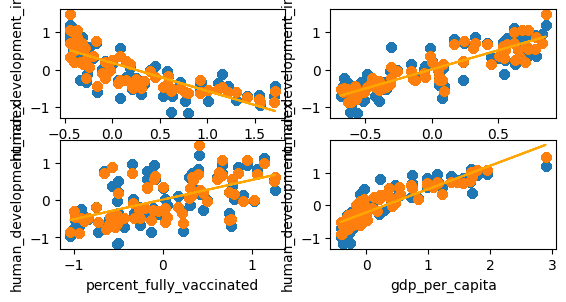

In [169]:
#a viz of the predicted vs trained data
plt.subplot(3, 2, 1)
a,b = np.polyfit(X_train[:, 0],y_pred,1)
plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_train[:, 0],y_pred)
plt.plot(X_train[:, 0], a * X_train[:, 0] + b, color="orange")
plt.xlabel("extreme_poverty")
plt.ylabel("human_development_index")


plt.subplot(3, 2, 2)
a,b = np.polyfit(X_train[:, 1],y_pred,1)
plt.scatter(X_train[:, 1], y_train)
plt.scatter(X_train[:, 1],y_pred)
plt.plot(X_train[:, 1], a * X_train[:, 1] + b, color="orange")
plt.xlabel("handwashing_facilities")
plt.ylabel("human_development_index")

plt.subplot(3, 2, 3)
a,b = np.polyfit(X_train[:, 2],y_pred,1)
plt.scatter(X_train[:, 2], y_train)
plt.scatter(X_train[:, 2],y_pred)
plt.plot(X_train[:, 2], a * X_train[:, 2] + b, color="orange")
plt.xlabel("percent_fully_vaccinated")
plt.ylabel("human_development_index")


plt.subplot(3, 2, 4)
a,b = np.polyfit(X_train[:, 3],y_pred,1)
plt.scatter(X_train[:, 3], y_train)
plt.scatter(X_train[:, 3],y_pred)
plt.plot(X_train[:, 3], a * X_train[:, 3] + b, color="orange")
plt.xlabel("gdp_per_capita")
plt.ylabel("human_development_index")


In [170]:
print(X_train)

[[ 0.33983287 -0.39629275 -0.06050034  0.        ]
 [ 0.93593315 -0.52681556 -0.50994017 -0.21770805]
 [-0.43175487  0.61433302 -0.66268845  1.46097775]
 ...
 [ 0.15041783 -0.12256525 -0.27160228 -0.24100658]
 [ 0.1448468   0.23464599  0.74014878  0.40030107]
 [ 1.15598886 -0.48125186  0.04292141  0.01250132]]


In [171]:
print (f"Model coeficients for features {X.columns} are {model.coef_}")

Model coeficients for features Index(['extreme_poverty', 'handwashing_facilities', 'percent_fully_vaccinated',
       'gdp_per_capita'],
      dtype='object') are [[-0.17672646  0.38749033  0.11318202  0.37919782]]


In [172]:
MSE = metrics.mean_squared_error(y_train, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.056422
RMSE,0.237533


In [173]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
y_pred= model.predict(X_test)

In [174]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.055912
RMSE,0.236458


In [177]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8500542464439066

In [178]:
y_pred

array([[ 0.26179649],
       [-0.85775833],
       [ 0.55849708],
       ...,
       [-0.27223119],
       [ 0.55849708],
       [ 0.19915726]])

In [179]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[0.65364696],
       [0.44988798],
       [0.70764647],
       ...,
       [0.55645392],
       [0.70764647],
       [0.64224662]])